In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tratamento dos dados

A cada valor X nos dados, será substituído pela moda da feature

In [3]:
eixo_3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/[en]Comunidadev8.xlsx").filter(["P51", "P52", "P53", "P54", "P55", "P56", "P57", "P58", "P59","P60", "P61", "P62", "P63", "P64", "P65", "P66", "P67", "P68", "P69", "P70", "P71", "P72", "P73", "P74", "P75", "perfil"])
#eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadev8.xlsx").filter(["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25", "perfil"])
eixo_3 = eixo_3.loc[0:169].reset_index(drop=True)
eixo_3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,perfil
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,quilombola
2,5,3,4,5,X,3,5,3,2,2,...,1,2,2,3,3,4,3,3,2,quilombola
3,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,quilombola
4,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,4,5,5,5,5,5,3,...,1,1,5,5,5,5,5,5,1,fishermen
166,5,5,5,5,5,5,5,5,5,5,...,1,1,5,5,5,5,1,5,1,fishermen
167,5,5,5,5,5,5,5,5,2,2,...,1,1,5,5,5,5,5,5,1,fishermen
168,5,5,5,5,4,5,5,5,2,3,...,1,1,5,1,1,3,1,5,1,fishermen


In [4]:
for col in eixo_3.columns:
  moda = eixo_3[col][eixo_3[col] != 'X'].mode()[0]
  eixo_3[col] = eixo_3[col].replace('X', moda)
eixo_3

/tmp/ipython-input-2641420073.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eixo_3[col] = eixo_3[col].replace('X', moda)


,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,perfil
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,quilombola
2,5,3,4,5,5,3,5,3,2,2,...,1,2,2,3,3,4,3,3,2,quilombola
3,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,quilombola
4,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,4,5,5,5,5,5,3,...,1,1,5,5,5,5,5,5,1,fishermen
166,5,5,5,5,5,5,5,5,5,5,...,1,1,5,5,5,5,1,5,1,fishermen
167,5,5,5,5,5,5,5,5,2,2,...,1,1,5,5,5,5,5,5,1,fishermen
168,5,5,5,5,4,5,5,5,2,3,...,1,1,5,1,1,3,1,5,1,fishermen


### Extração de Características

In [5]:
"""
eixo_1.replace('X', np.nan, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1
"""

"\neixo_1.replace('X', np.nan, inplace=True)\n#eixo_1.replace('x', pd.NA, inplace=True)\neixo_1.dropna(inplace=True)\neixo_1 = eixo_1.reset_index()\neixo_1 = eixo_1.drop('index', axis=1)\neixo_1\n"

In [6]:
eixo_3['perfil'].unique()

array(['quilombola', 'indigenous', 'fishermen', 'urban',
       'extractivists/farmers'], dtype=object)

Padronizando tudo para float

In [7]:
eixo_3[["P51", "P52", "P53", "P54", "P55", "P56", "P57", "P58", "P59","P60", "P61", "P62", "P63", "P64", "P65", "P66", "P67", "P68", "P69", "P70", "P71", "P72", "P73", "P74", "P75"]].astype(float)

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75
0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,2.0,4.0
1,4.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,3.0,4.0,...,2.0,3.0,4.0,2.0,2.0,2.0,5.0,3.0,4.0,3.0
2,5.0,3.0,4.0,5.0,5.0,3.0,5.0,3.0,2.0,2.0,...,2.0,1.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0
3,2.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,4.0,2.0,1.0,3.0,3.0,3.0
4,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,3.0,1.0,...,3.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,...,4.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0
166,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3.0,1.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0
167,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0
168,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,3.0,...,1.0,1.0,1.0,5.0,1.0,1.0,3.0,1.0,5.0,1.0


In [8]:
eixo_3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,perfil
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,quilombola
2,5,3,4,5,5,3,5,3,2,2,...,1,2,2,3,3,4,3,3,2,quilombola
3,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,quilombola
4,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,4,5,5,5,5,5,3,...,1,1,5,5,5,5,5,5,1,fishermen
166,5,5,5,5,5,5,5,5,5,5,...,1,1,5,5,5,5,1,5,1,fishermen
167,5,5,5,5,5,5,5,5,2,2,...,1,1,5,5,5,5,5,5,1,fishermen
168,5,5,5,5,4,5,5,5,2,3,...,1,1,5,1,1,3,1,5,1,fishermen


In [9]:
X = eixo_3.drop("perfil", axis=1)
y = eixo_3["perfil"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Avaliar o modelo
y_pred = forest.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7352941176470589


In [ ]:
# Obter importâncias das características
importances = forest.feature_importances_

# Mostrar as 10 características mais importantes
indices = np.argsort(importances)[-12:]
print("Características mais importantes:", X.columns[indices])

Características mais importantes: Index(['P74', 'P73', 'P58', 'P61', 'P67', 'P71', 'P62', 'P66', 'P69', 'P59',
       'P75', 'P68'],
      dtype='object')


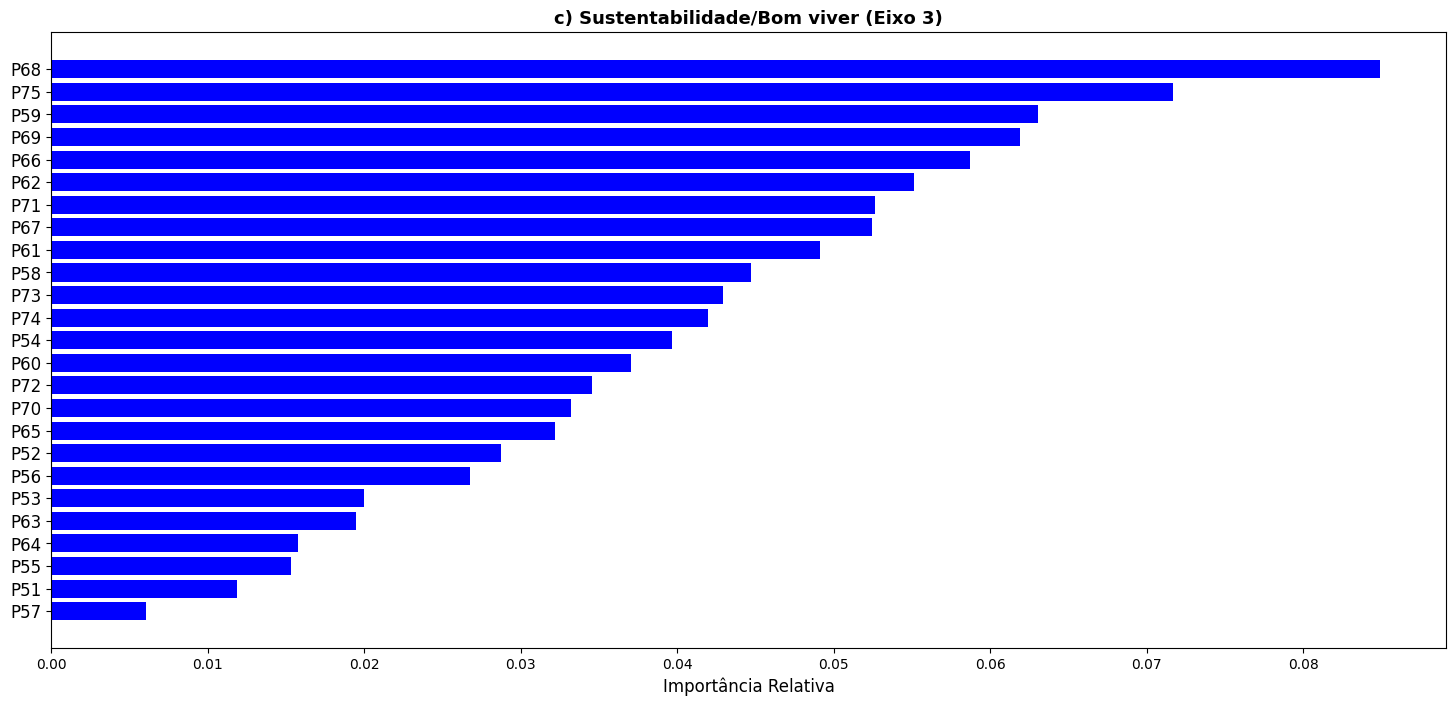

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
labels = X.columns[indices]

# Criar o gráfico
plt.figure(figsize=(18, 8))
plt.title('c) Sustentabilidade/Bom viver (Eixo 3)', fontsize=13, fontweight='bold')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels, fontsize=12)
plt.xlabel('Importância Relativa', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### Montando a árvores com as features filtradas

As 12, 11 ou 9 primeiras tiverem acurácia boa, mas com 11 features foi superior as demais

In [11]:
colunas = ["P58", "P61", "P67", "P71", "P62", "P66", "P69", "P59", "P75", "P68", "perfil"] #"P74", "P73", "P58", "P61", "P67", "P71", "P62", "P66", "P69", "P59", "P75", "P68", "perfil"
eixo_3_ = eixo_3[colunas]
eixo_3_

,P58,P61,P67,P71,P62,P66,P69,P59,P75,P68,perfil
0,2,3,3,3,3,3,3,3,4,3,quilombola
1,3,4,3,2,2,2,2,3,3,4,quilombola
2,3,1,1,3,3,2,2,2,2,2,quilombola
3,3,3,3,2,1,3,3,3,3,2,quilombola
4,5,1,5,5,3,3,5,3,3,5,quilombola
...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,1,5,5,4,5,5,1,1,fishermen
166,5,5,1,5,5,3,5,5,1,1,fishermen
167,5,5,1,5,5,5,5,2,1,1,fishermen
168,5,5,1,1,5,1,5,2,1,1,fishermen


In [12]:
X_ = eixo_3_.drop("perfil", axis=1)
y_ = eixo_3_["perfil"]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [13]:
param_grid = {
    'criterion': ['entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 'log2', None]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'log_loss'],
                         'max_depth': [None, 5, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [14]:
print("Melhores parâmetros:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [15]:
# Previsões do melhor modelo
y_pred = best_clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.6764705882352942
Relatório de Classificação:
                        precision    recall  f1-score   support

extractivists/farmers       0.60      0.86      0.71         7
            fishermen       0.80      0.57      0.67         7
           indigenous       0.40      0.50      0.44         4
           quilombola       0.83      0.83      0.83        12
                urban       0.50      0.25      0.33         4

             accuracy                           0.68        34
            macro avg       0.63      0.60      0.60        34
         weighted avg       0.69      0.68      0.67        34



In [16]:
best_clf.get_n_leaves()

np.int64(35)

In [17]:
best_clf.get_depth()

8

### Visualizando

In [18]:
column_names = X_.columns
target_names = eixo_3_['perfil'].unique()

In [19]:
print(target_names)

['quilombola' 'indigenous' 'fishermen' 'urban' 'extractivists/farmers']


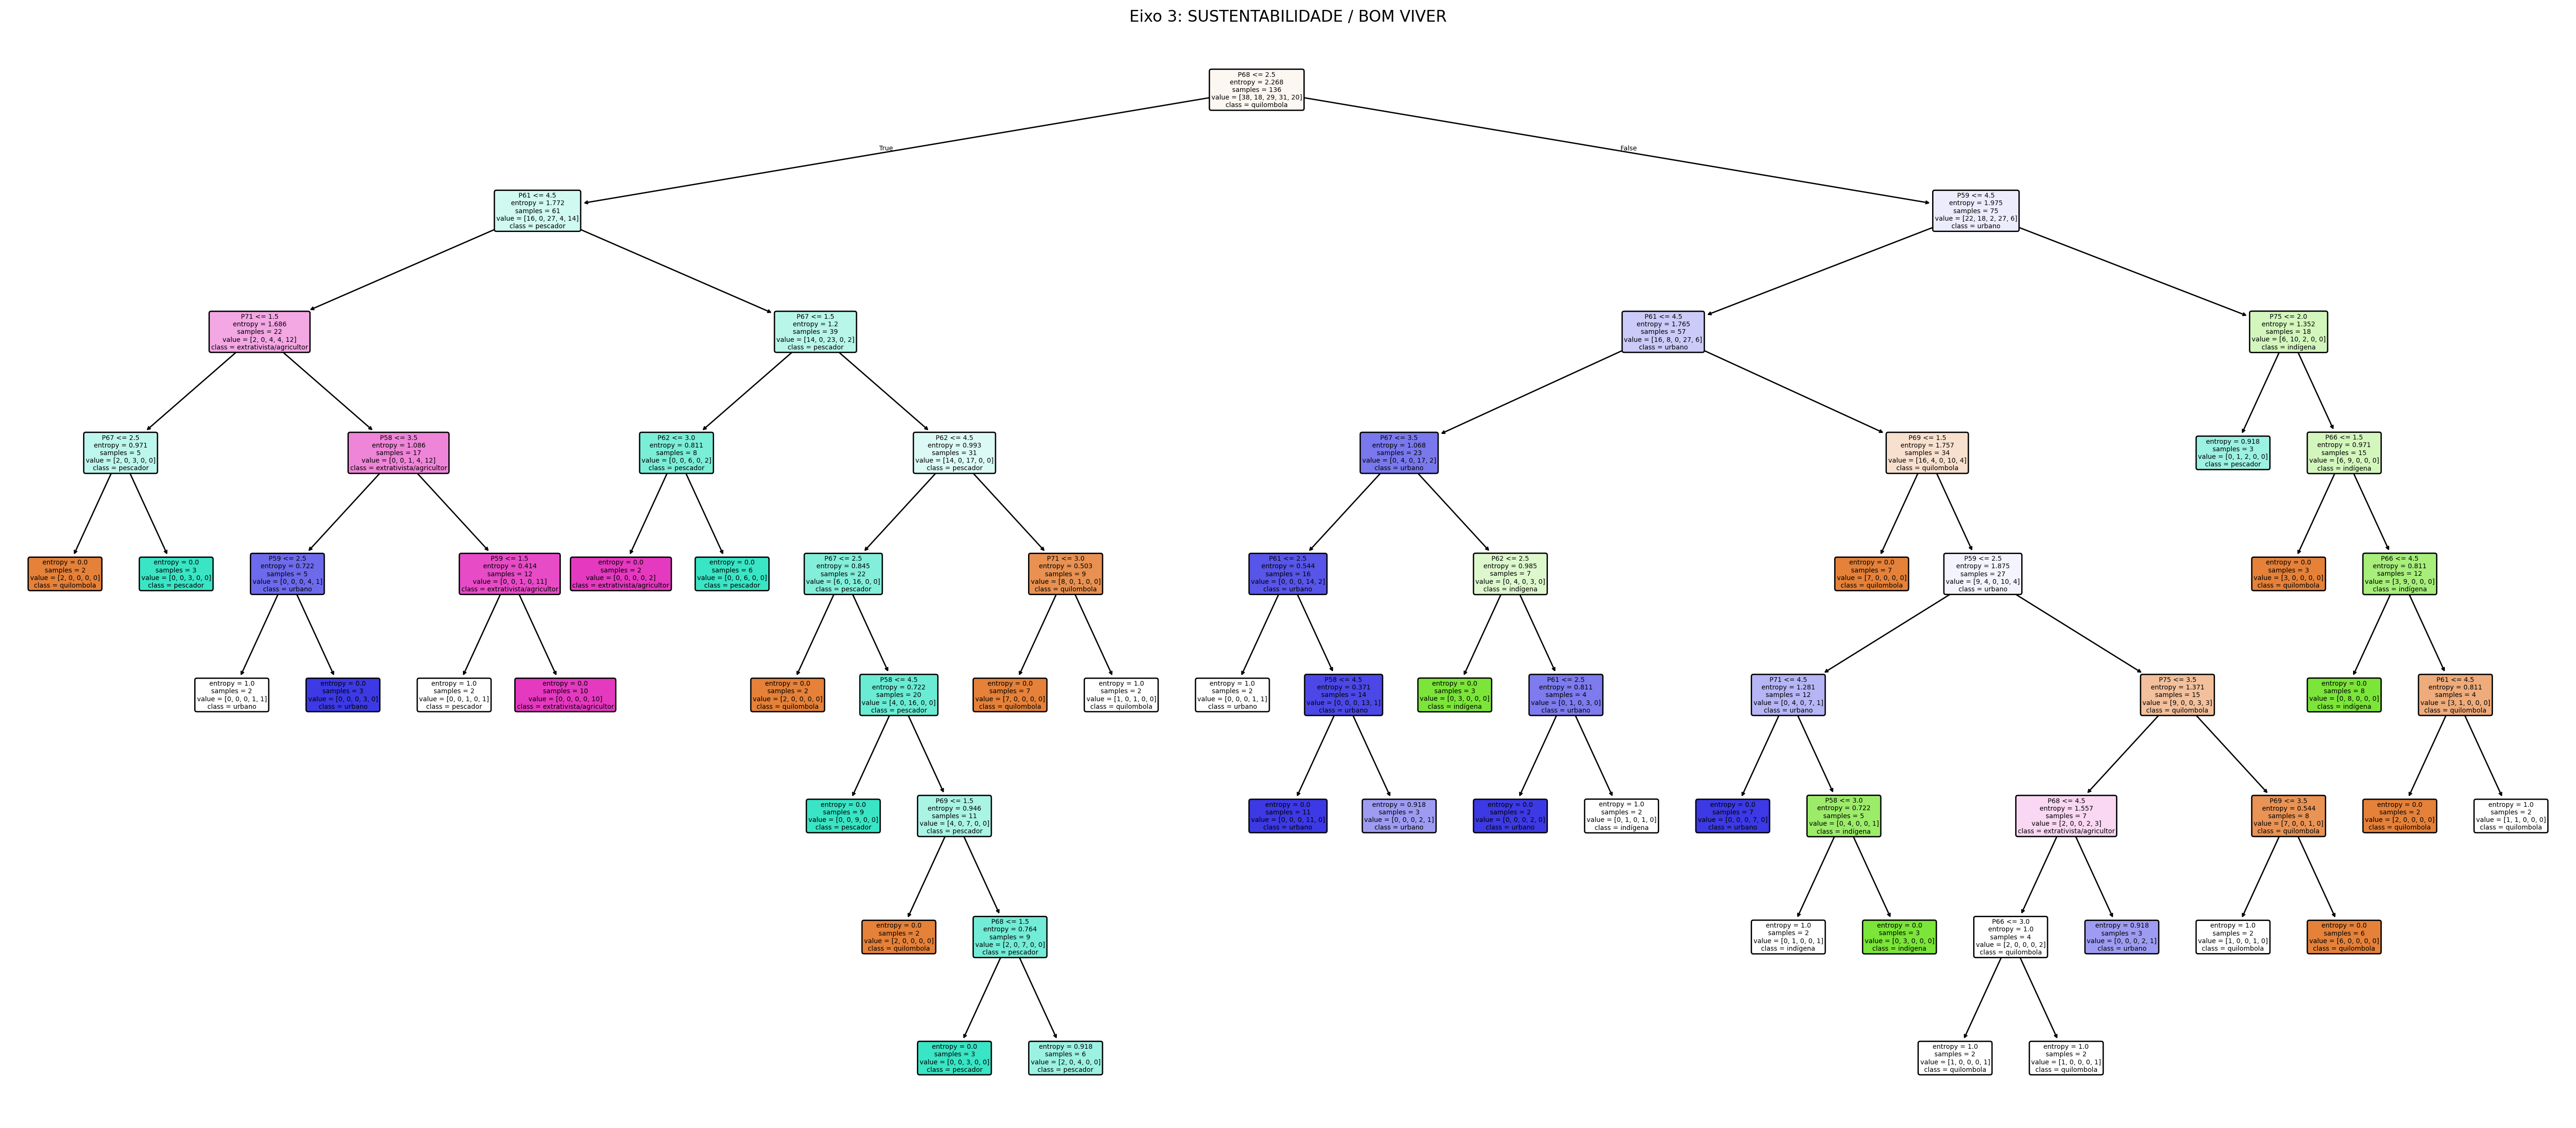

In [ ]:
plt.figure( figsize=(35,15),dpi=200)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5
                    )
plt.title("Eixo 3: SUSTENTABILIDADE / BOM VIVER")
plt.show()

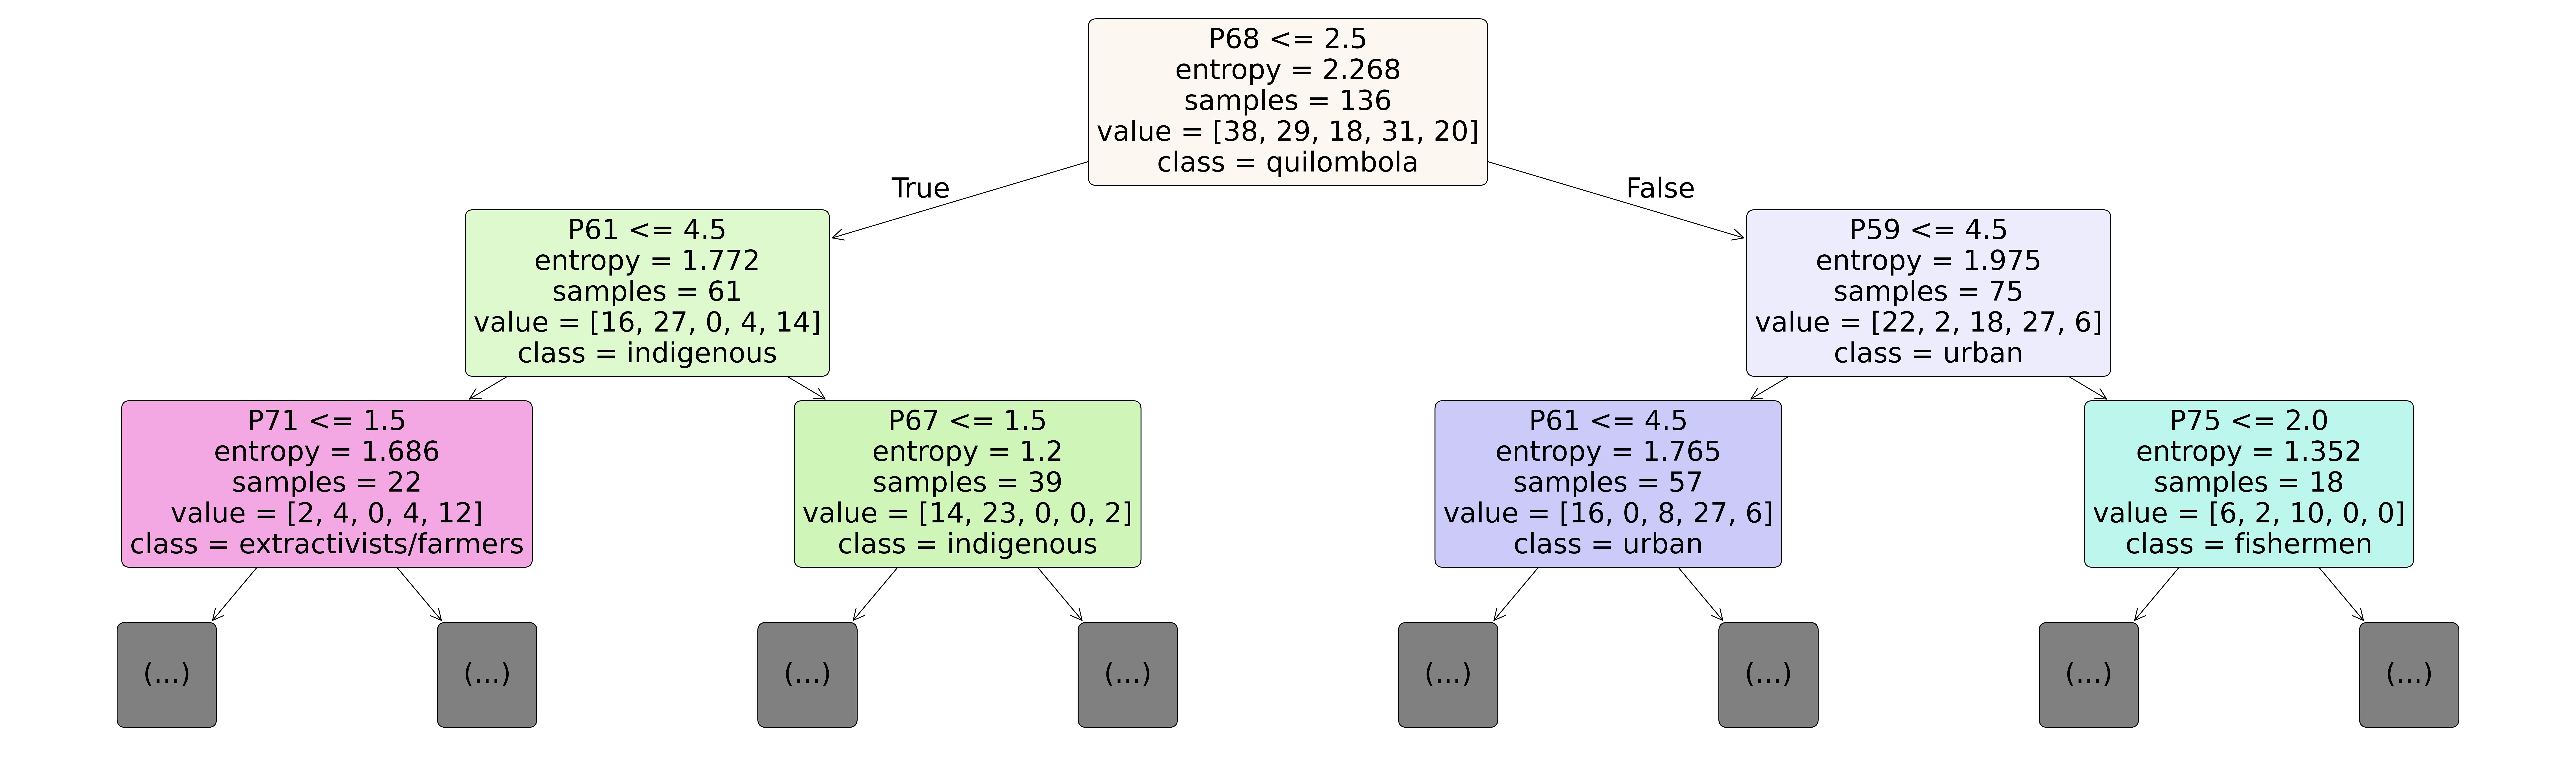

In [21]:
plt.figure( figsize=(50,15),dpi=300)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=30,
                      max_depth=2
                    )
plt.show()

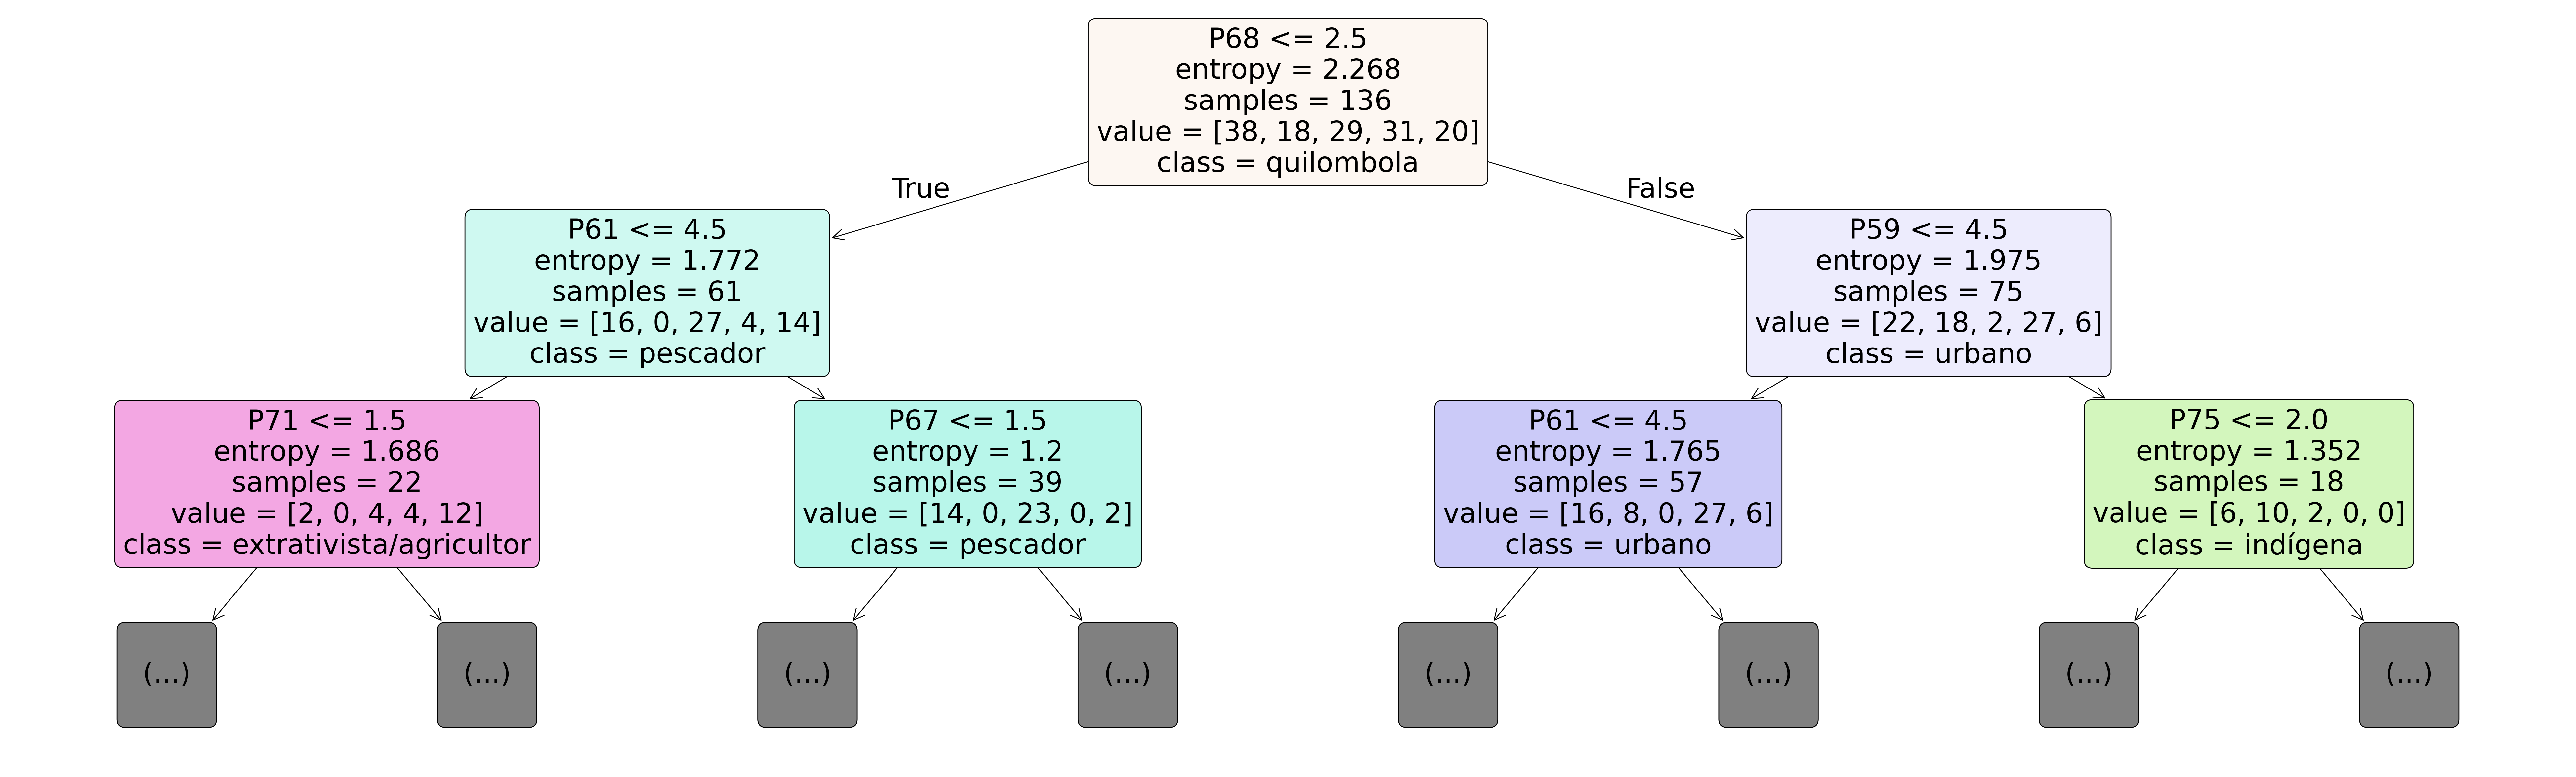

In [ ]:
plt.figure( figsize=(50,15),dpi=200)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=30,
                      max_depth=2
                    )
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_text = export_text(best_clf, feature_names=column_names)
print(tree_text)

|--- P68 <= 2.50
|   |--- P61 <= 4.50
|   |   |--- P71 <= 1.50
|   |   |   |--- P67 <= 2.50
|   |   |   |   |--- class: extrativista/agricultor
|   |   |   |--- P67 >  2.50
|   |   |   |   |--- class: pescador
|   |   |--- P71 >  1.50
|   |   |   |--- P58 <= 3.50
|   |   |   |   |--- P59 <= 2.50
|   |   |   |   |   |--- class: quilombola
|   |   |   |   |--- P59 >  2.50
|   |   |   |   |   |--- class: quilombola
|   |   |   |--- P58 >  3.50
|   |   |   |   |--- P59 <= 1.50
|   |   |   |   |   |--- class: pescador
|   |   |   |   |--- P59 >  1.50
|   |   |   |   |   |--- class: urbano
|   |--- P61 >  4.50
|   |   |--- P67 <= 1.50
|   |   |   |--- P62 <= 3.00
|   |   |   |   |--- class: urbano
|   |   |   |--- P62 >  3.00
|   |   |   |   |--- class: pescador
|   |   |--- P67 >  1.50
|   |   |   |--- P62 <= 4.50
|   |   |   |   |--- P67 <= 2.50
|   |   |   |   |   |--- class: extrativista/agricultor
|   |   |   |   |--- P67 >  2.50
|   |   |   |   |   |--- P58 <= 4.50
|   |   |   |   |   